In [ ]:
import data_analysis.data_processing as dp
import data_analysis.data_learning as dl
import gc

# reload module to bypass caching
import importlib
importlib.reload(dp)
importlib.reload(dl)

# paths
test_window_path_home = dp.Path(r'\\?\C:\Users\jannis\Documents\HSP_IDS\Material\Aktuell\2025-02-17_11-14-33_192.168.1.0-normal_1\1554220324.748197-1554220354.748197') # treat it as a long path to avoid path length issues on windows
test_window_path_remote = dp.Path(r'/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-03-04_00-03-20_192.168.1.0-normal_DDoS_1/1556203726.876922-1556203756.876922')

data_set_path = dp.Path(r'/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes')
ddos_test_path_parquet = dp.Path(r'/home/hsp252/Development/DDoS')

# initiate data
parquet_paths_one_file = ['/home/hsp252/Development/intrusion_sorted/DDoS/intrusion_normal_DDoS_10_final.parquet',
                          '/home/hsp252/Development/intrusion_sorted/DoS/intrusion_normal_DoS_1_final.parquet',
                          '/home/hsp252/Development/intrusion_sorted/injection/intrusion_injection_normal1_final.parquet',
                          '/home/hsp252/Development/intrusion_sorted/mitm/intrusion_MITM_normal1_final.parquet',
                          '/home/hsp252/Development/intrusion_sorted/runsomware/intrusion_normal_runsomware1_final.parquet',
                          '/home/hsp252/Development/intrusion_sorted/scanning/intrusion_normal_scanning1_final.parquet',
                          '/home/hsp252/Development/intrusion_sorted/backdoor/intrusion_normal_backdoor_final.parquet',
                          '/home/hsp252/Development/benign/benign_normal_10_final.parquet']

parquet_paths = ['/home/hsp252/Development/intrusion_sorted/DDoS',
                 '/home/hsp252/Development/intrusion_sorted/DoS',
                 '/home/hsp252/Development/intrusion_sorted/injection',
                 '/home/hsp252/Development/intrusion_sorted/mitm',
                 '/home/hsp252/Development/intrusion_sorted/runsomware',
                 '/home/hsp252/Development/intrusion_sorted/scanning',
                 '/home/hsp252/Development/intrusion_sorted/backdoor',
                 '/home/hsp252/Development/benign']

s1_cols = [
    "gq_mean_queue_length", "gq_median_queue_length", "gq_mean_growth_rate",
    "gq_median_growth_rate", "gq_growth_rates_percentage", "gq_growth_rates",
    "gq_popped_pkts_iteration", "gq_popped_pkts_cumulative", "gq_shortest_queue",
    "gq_longest_queue", "gq_host_count", "gq_host_count_diff",
    "gq_mean_host_queue_length", "gq_median_host_queue_length",
    "gq_most_active_host_based_on_pkts", "gq_host_queue_length_variance",
    "gq_host_queue_length_entropy", "gq_mean_protocol_queue_length",
    "gq_protocol_queue_length_variance", "gq_protocol_queue_length_entropy",
    "gq_protocol_queue_count", "gq_protocol_queue_count_diff",
    "gq_median_protocol_queue_length", "gq_protocol_queue_count_layer_4_below",
    "gq_total_cache_len", "gq_active_router_count", "gq_active_router_in_cache_count",
    "gq_non_protocol_non_host_queues", "gq_protocol_queue_count_layer_4_below.1",
    "gq_mean_priority", "gq_median_priority", "time_window_start", "time_window_end"
]

s2_cols = [
    "sq_identifier", "sq_queue_length", "sq_priority", "sq_popped_pkts",
    "sq_most_active_protocols", "time_window_start", "time_window_end",
    "growth_rate_percentage", "growth_rate", "is_longest_queue",
    "is_shortest_queue", "is_most_active_host_based_on_packets"
]

s3_cols = [
    "sq_identifier", "sq_connection_count", "sq_connection_count_diff",
    "sq_connection_type_counts", "sq_cq_connection_queues_length_sum_iteration",
    "sq_cq_connection_queues_length_median", "sq_cq_connection_queues_length_mean",
    "time_window_start", "time_window_end", "connection_tcp_udp_other_ratio"
]

connection_cols = [
    "selected_queue", "window_time_key", "analysis_time_key", "host_ct_dst_addresses",
    "host_mode_dst_addresses", "host_ct_src_ports", "host_mode_src_ports",
    "host_ct_dst_ports", "host_mode_dst_ports", "host_ct_protocols",
    "host_mode_protocols", "host_ct_syn", "host_ct_ack", "host_ct_fin",
    "host_ct_cwr", "host_ct_psh", "host_ct_urg", "host_ct_ecn", "host_ct_rst",
    "host_mode_tcp_flags", "host_ct_pkt_lens", "host_mode_pkt_lens",
    "conn_window_start_time", "conn_window_end_time", "conn_protocol",
    "conn_src_ip", "conn_dst_ip", "conn_src_port", "conn_dst_port",
    "conn_connection_state", "conn_duration", "conn_packets/s", "conn_bytes_src",
    "conn_bytes_dst", "conn_src_ttl", "conn_dst_ttl", "conn_#src_pkts",
    "conn_#dst_pkts", "conn_src_dst_ratio", "conn_min_src_pkt_len",
    "conn_max_src_pkt_len", "conn_mean_src_pkt_len", "conn_stdev_src_pkt_len",
    "conn_mode_src_pkt_len", "conn_median_src_pkt_len", "conn_min_dst_pkt_len",
    "conn_max_dst_pkt_len", "conn_mean_dst_pkt_len", "conn_stdev_dst_pkt_len",
    "conn_mode_dst_pkt_len", "conn_median_dst_pkt_len", "conn_min_src_iats",
    "conn_max_src_iats", "conn_mean_src_iats", "conn_stdev_src_iats",
    "conn_median_src_iats", "conn_var_src_iats", "conn_min_dst_iats",
    "conn_max_dst_iats", "conn_mean_dst_iats", "conn_stdev_dst_iats",
    "conn_median_dst_iats", "conn_var_dst_iats", "conn_ct_src_syn",
    "conn_ct_src_ack", "conn_ct_src_fin", "conn_ct_src_cwr", "conn_ct_dst_syn",
    "conn_ct_dst_ack", "conn_ct_dst_fin", "conn_ct_dst_cwr",
    "conn_min_src_payload_len", "conn_max_src_payload_len",
    "conn_stdev_src_payload_len", "conn_median_src_payload_len",
    "conn_var_src_payload_len", "conn_mean_src_payload_len",
    "conn_1st_quartile_src_payload_len", "conn_3rd_quartile_src_payload_len",
    "conn_min_max_diff_src_payload_len", "conn_rms_src_payload_len",
    "conn_g1_skew_src_payload_len", "conn_G1_skew_src_payload_len",
    "conn_sk1_skew_src_payload_len", "conn_sk2_skew_src_payload_len",
    "conn_galton_skew_src_payload_len", "conn_entropy_src_payload_len",
    "conn_kurtosis_src_payload_len", "conn_coeff_variation_src_payload_len",
    "conn_min_dst_payload_len", "conn_max_dst_payload_len",
    "conn_stdev_dst_payload_len", "conn_median_dst_payload_len",
    "conn_var_dst_payload_len", "conn_mean_dst_payload_len",
    "conn_1st_quartile_dst_payload_len", "conn_3rd_quartile_dst_payload_len",
    "conn_min_max_diff_dst_payload_len", "conn_rms_dst_payload_len",
    "conn_g1_skew_dst_payload_len", "conn_G1_skew_dst_payload_len",
    "conn_sk1_skew_dst_payload_len", "conn_sk2_skew_dst_payload_len",
    "conn_galton_skew_dst_payload_len", "conn_entropy_dst_payload_len",
    "conn_kurtosis_dst_payload_len", "conn_coeff_variation_dst_payload_len",
    "conn_mean_relative_times", "conn_median_relative_times",
    "conn_1st_quartile_relative_times", "conn_3rd_quartile_relative_times",
    "conn_significant_spaces_src", "conn_significant_spaces_dst",
    "conn_count_of_zeros_src", "conn_count_of_zeros_dst"
]

attack_types = ['ddos', 'dos', 'injection', 'mitm', 'runsomware', 'scanning', 'backdoor', 'normal']

NR_MIN_ELEMENTS_IN_ONE_FILE = 27278 # -> nicht viel
NR_MAX_ELEMENTS_IN_ONE_FILE = 6083416

NR_MAX_ELEMENTS_IN_ALL_FILES = 75900167
NR_MIN_ELEMENTS_IN_ALL_FILES = 29243 # -> nicht viel

train_fvs = dp.pd.DataFrame()
train_labels = dp.pd.DataFrame()


/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [11]:
# reload module to bypass caching
import importlib
importlib.reload(dp)
importlib.reload(dl)

# train rfc
train_fvs, train_labels = dp.get_fvs_from_parquet(parquet_paths,
                                      NR_MIN_ELEMENTS_IN_ALL_FILES,
                                      attack_types,
                                      all_samples=False)
print(train_fvs.shape)
print(train_labels.shape)
best_rfc, best_params_before, predictions, accuracy, feature_importances = dl.rfc_train_test(train_fvs, train_labels)
dl.save_to_pickle(best_rfc, '/home/hsp252/Development/HSP_IDS/rfc_balanced.pkl')

# test rfc on random data
test_fvs, test_labels = dp.get_fvs_from_parquet(parquet_paths,
                                                2000,
                                                attack_types,
                                                all_samples=False)

# test_fvs = dp.read_parquet('/home/hsp252/Development/intrusion_sorted/mitm/intrusion_MITM_normal4_final.parquet')
# test_labels = dp.pd.DataFrame({'attack_type': ['mitm'] * fvs.shape[0]})

test_predictions = best_rfc.predict(test_fvs)
test_accuracy_before = dl.accuracy_score(test_labels, test_predictions)
test_confusion_matrix_before = dl.confusion_matrix(labels=attack_types, y_true=test_labels, y_pred=test_predictions)

# get important features from training data
feature_importance_df = dp.pd.DataFrame({'feature': train_fvs.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
important_features = feature_importance_df['feature'][:20][::-1].to_numpy()
important_features_values = feature_importance_df['importance'][:20][::-1].to_numpy()

# train again by using only important features of training data
train_fvs = train_fvs[important_features]
after_rfc, best_params_after, predictions, accuracy, feature_importances = dl.rfc_train_test(train_fvs, train_labels)

# test again by using only important features of test data
test_fvs = test_fvs[important_features]
test_predictions = after_rfc.predict(test_fvs)
test_accuracy_after = dl.accuracy_score(test_labels, test_predictions)
test_confusion_matrix_after = dl.confusion_matrix(labels=attack_types, y_true=test_labels, y_pred=test_predictions)

# print results
print(f"best params before feature selection: {best_params_before}")
print(f"accurracy before feature selection: {test_accuracy_before}")
print(f"confusion matrix before feature selection: {test_confusion_matrix_before}")

print(f"best params after feature selection: {best_params_after}")
print(f"accurracy after feature selection: {test_accuracy_after}")
print(f"confusion matrix after feature selection: {test_confusion_matrix_after}")

(233944, 157)
(233944, 1)


/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d a

saved data


/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d a

best params before feature selection: {'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 500}
accurracy before feature selection: 0.9996875
confusion matrix before feature selection: [[2000    0    0    0    0    0    0    0]
 [   0 2000    0    0    0    0    0    0]
 [   0    0 1999    0    0    0    1    0]
 [   0    0    0 2000    0    0    0    0]
 [   0    0    0    0 2000    0    0    0]
 [   0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0 1999    1]
 [   0    0    0    3    0    0    0 1997]]
best params after feature selection: {'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 1000}
accurracy after feature selection: 0.9996875
confusion matrix after feature selection: [[2000    0    0    0    0    0    0    0]
 [   0 2000    0    0    0    0    0    0]
 [   0    0 1999    0    0    0    1    0]
 [   0    0    0 2000    0    0    0    0]
 [   0    0    0    0 2000    0    0    0]
 [   0    0    0    0    0 2000    0    0]
 [   0    0    0    2

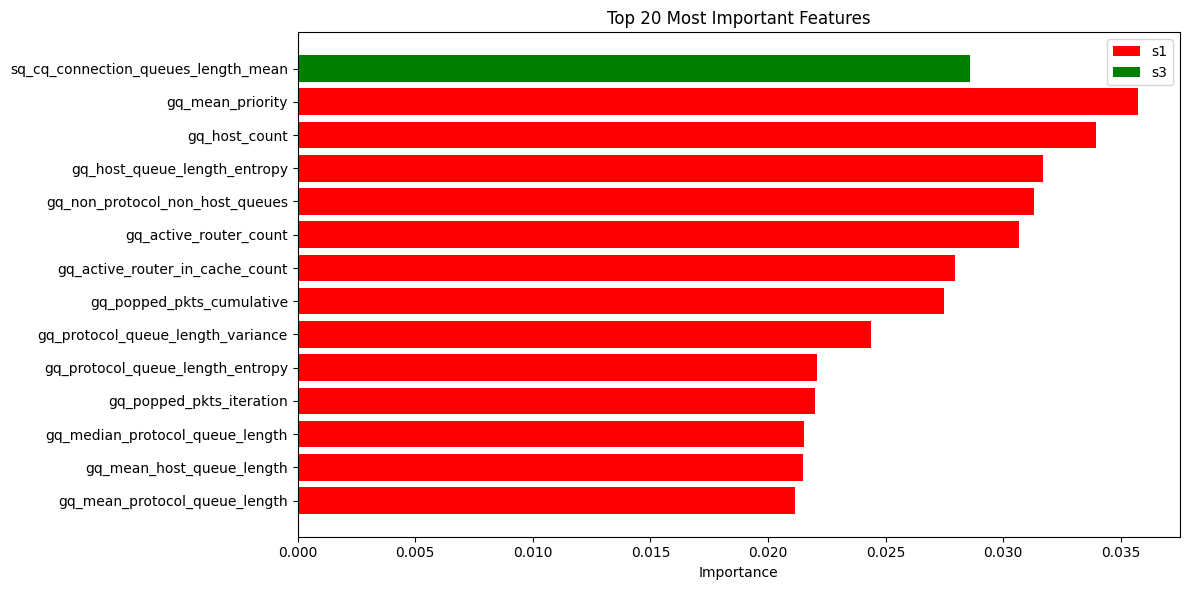

In [13]:
# reload module to bypass caching
import importlib
importlib.reload(dp)
importlib.reload(dl)

# plot feature importances
# s1_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/s1_general_qs.csv').to_list()
# connection_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/192.168.1.152/connections/1556466432.434372-1556466442.434372/96.0_192.168.1.193_49338.0_192.168.1.152_1880.0/host_data_chunk_full.csv').to_list()
# s2_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/192.168.1.152/s2_selected_qs.csv').to_list()
# s3_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/192.168.1.152/s3_connection_qs.csv').to_list()

s1_mask = [i for i, feature in enumerate(important_features) if feature in s1_cols]
s2_mask = [i for i, feature in enumerate(important_features) if feature in s2_cols]
s3_mask = [i for i, feature in enumerate(important_features) if feature in s3_cols]
connection_mask = [i for i, feature in enumerate(important_features) if feature in connection_cols]

dp.plt.figure(figsize=(12, 6))

if s1_mask:
        dp.plt.barh(important_features[s1_mask], important_features_values[s1_mask], color = 'red', label='s1')
if s2_mask:
        dp.plt.barh(important_features[s2_mask], important_features_values[s2_mask], color = 'blue', label='s2')
if s3_mask:
        dp.plt.barh(important_features[s3_mask], important_features_values[s3_mask], color = 'green', label='s3')
if connection_mask:
        dp.plt.barh(important_features[connection_mask], important_features_values[connection_mask], color = 'orange', label='connection')
dp.plt.xlabel("Importance")
dp.plt.title("Top 20 Most Important Features")
dp.plt.tight_layout()
dp.plt.legend()
dp.plt.show()

In [ ]:
# TODO: only use most important features for classification and see if accuracy will get better
# TODO: try one classifier per attack type and see if accuracy will get better